Python 7 - Mini Assignment - Oscar Cerino

In [6]:
from statsmodels.formula.api import ols
import pandas as pd

In [7]:
# Read in the GPA.csv file and view the head and tail
df_GPA = pd.read_csv("./GPA.csv")
print(df_GPA)
print(df_GPA.head())
print(df_GPA.tail())

          major  test_score  sat_reading    gpa   class
0    undeclared          21          466  3.897   Fresh
1      declared          14          502  3.885  Senior
2    undeclared          28          548  3.778    Soph
3      declared          22          480  2.540  Junior
4    undeclared          21          460  3.028    Soph
..          ...         ...          ...    ...     ...
115    declared          20          552  3.885  Junior
116  undeclared          29          523  3.800   Fresh
117    declared          28          527  3.914  Senior
118    declared          16          552  1.860  Junior
119  undeclared          28          506  2.948   Fresh

[120 rows x 5 columns]
        major  test_score  sat_reading    gpa   class
0  undeclared          21          466  3.897   Fresh
1    declared          14          502  3.885  Senior
2  undeclared          28          548  3.778    Soph
3    declared          22          480  2.540  Junior
4  undeclared          21         

In [34]:
# Find summary statistics for test score, sat reading, and gpa
print(df_GPA.test_score.describe())
print(df_GPA.sat_reading.describe())
print(df_GPA.gpa.describe())

count    120.000000
mean      24.725000
std        4.472065
min       14.000000
25%       21.000000
50%       25.000000
75%       28.000000
max       35.000000
Name: test_score, dtype: float64
count    120.000000
mean     501.850000
std       37.160712
min      408.000000
25%      474.500000
50%      503.000000
75%      525.250000
max      589.000000
Name: sat_reading, dtype: float64
count    120.000000
mean       3.074050
std        0.644338
min        0.500000
25%        2.688750
50%        3.077500
75%        3.593250
max        4.000000
Name: gpa, dtype: float64


In [35]:
# Get value counts for major and class
print(df_GPA.major.value_counts())
print(df_GPA['class'].value_counts())

declared      78
undeclared    42
Name: major, dtype: int64
Junior    41
Senior    37
Fresh     29
Soph      13
Name: class, dtype: int64


In [45]:
# import the StatTests module with the MeansTest and mult_reg functions
import StatTests

The groups are undeclared and declared

This is a test of equal variances with Ho: The variances are equal
The t test statistic is 2.701 and the p-value is 0.1003
Conclusion: Fail to Reject Ho: We can't reject that the variances are the same

This is a Two-Sample t test (assuming equal variances) of equal means with Ho: The group means are equal
The t test statistic is 1.03 and the p-value is 0.3051
Conclusion: Fail to Reject Ho: We can't reject that the means are the same


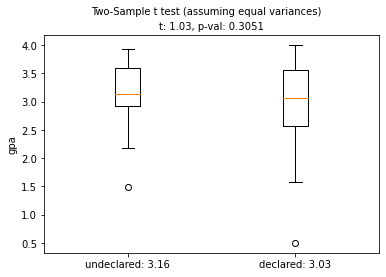

In [48]:
# Compare the gpa means by major
StatTests.MeansTest(df_GPA, "major","gpa")

# What is your conclusion (use terms from the problem)
Conclusion: Fail to Reject Ho: We can't reject that the means are the same

The groups are undeclared and declared

This is a test of equal variances with Ho: The variances are equal
The t test statistic is 0.2 and the p-value is 0.655
Conclusion: Fail to Reject Ho: We can't reject that the variances are the same

This is a Two-Sample t test (assuming equal variances) of equal means with Ho: The group means are equal
The t test statistic is 0.104 and the p-value is 0.9173
Conclusion: Fail to Reject Ho: We can't reject that the means are the same


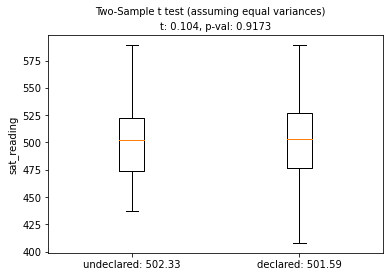

In [49]:
# Compare the sat reading means by major
StatTests.MeansTest(df_GPA, "major","sat_reading")

# What is your conclusion (use terms from the problem)
Conclusion: Fail to Reject Ho: We can't reject that the means are the same

The groups are Fresh and Senior and Soph and Junior
This is a test of equal means with Ho: The means of all groups are equal/Ha: At least one group mean is different
The F test statistic is 2.205 and the p-value is 0.0912
Conclusion: Fail to Reject Ho: We can't reject that the means are the same


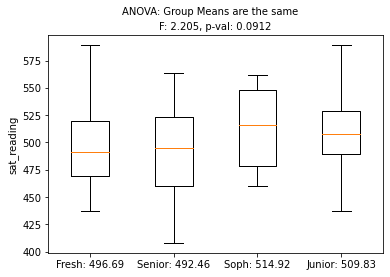

Ho: The group means are equal
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
 Fresh Junior  13.1396 0.4546 -10.0159 36.2952  False
 Fresh Senior  -4.2302    0.9 -27.8986 19.4382  False
 Fresh   Soph  18.2334 0.4468 -13.6196 50.0865  False
Junior Senior -17.3698 0.1618 -39.0095  4.2699  False
Junior   Soph   5.0938    0.9 -25.2822 35.4698  False
Senior   Soph  22.4636 0.2325  -8.3051 53.2323  False
-----------------------------------------------------


C:\Users\lilos\anaconda3\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


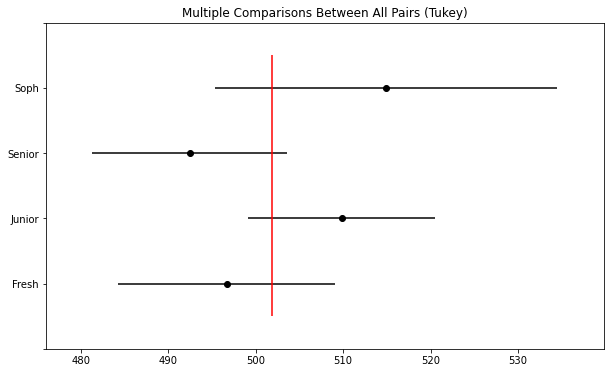

In [50]:
#compare the sat reading scores by class
StatTests.MeansTest(df_GPA, "class","sat_reading")

# What is your conclusion (use terms from the problem)
Conclusion: Fail to Reject Ho: We can't reject that the means are the same

In [51]:
# predict gpa with sat_reading
model1 = ols("gpa ~ sat_reading", data=df_GPA).fit()
print(model1.summary()) # Print the results

                            OLS Regression Results                            
Dep. Variable:                    gpa   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.7048
Date:                Tue, 09 Nov 2021   Prob (F-statistic):              0.403
Time:                        09:22:18   Log-Likelihood:                -116.67
No. Observations:                 120   AIC:                             237.3
Df Residuals:                     118   BIC:                             242.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.4036      0.801      3.001      

# What is your conclusion (use terms from the problem)
prob(f-stat) is equal to 0.7 which is greater than 0.05 so this means we don't have conclusive evidence to prove that gpa predicts sat_reading score

In [53]:
# predict sat_reading with gpa
model2 = ols("sat_reading ~ gpa", data=df_GPA).fit()
print(model2.summary()) # Print the results

                            OLS Regression Results                            
Dep. Variable:            sat_reading   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.7048
Date:                Tue, 09 Nov 2021   Prob (F-statistic):              0.403
Time:                        09:25:34   Log-Likelihood:                -603.24
No. Observations:                 120   AIC:                             1210.
Df Residuals:                     118   BIC:                             1216.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    488.1895     16.623     29.368      0.0

# What is your conclusion (use terms from the problem)
prob(f-stat) is equal to 0.7 which is greater than 0.05 so this means we don't have conclusive evidence to prove that sat_reading score predicts gpa

                            OLS Regression Results                            
Dep. Variable:            sat_reading   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.7107
Date:                Tue, 09 Nov 2021   Prob (F-statistic):              0.548
Time:                        09:34:53   Log-Likelihood:                -602.51
No. Observations:                 120   AIC:                             1213.
Df Residuals:                     116   BIC:                             1224.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             470.1862    

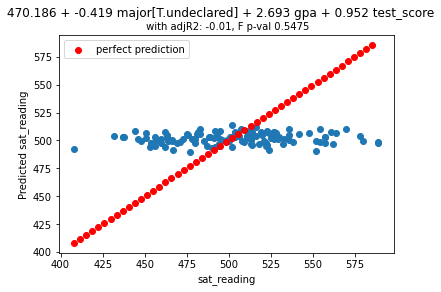

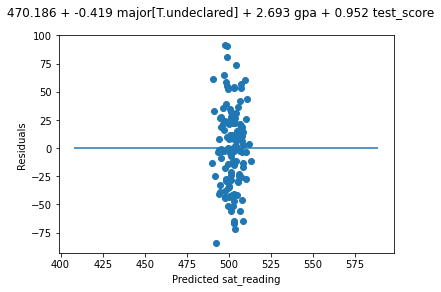

In [54]:
# predict sat_reading with gpa, major and test_score
model3 = ols("sat_reading ~ gpa + major + test_score", data=df_GPA).fit()
ydata= df_GPA["sat_reading"]
print(model3.summary()) # Print the results
StatTests.mult_reg(model3, ydata)

# What is your conclusion (use terms from the problem)
prob(f-stat) is equal to 0.548 which is greater than 0.05 so this means we don't have conclusive evidence to prove that test_score, gpa, or whether you've declared your major predicts sat_reading score